In [1]:
import pandas as pd
import numpy as np
import gurobipy as gb
from gurobipy import *

# Establish work dataset

Montreal population information, based on Forward Sortation Area.

In [2]:
pop_data = pd.read_csv('Data/mtl_postal_pop.csv')
pop_data

,Forward Sortation Area (FSA),City,Administrative Region,Population,Area(km2)
0,H1A,NaN,NaN,31863.0,15.2
1,H1B,NaN,Quebec,19884.0,13.4
2,H1C,Montreal,Quebec,13538.0,11.2
3,H1E,Montreal,Quebec,43532.0,11.1
4,H1G,Montreal,Quebec,49857.0,7.9
...,...,...,...,...,...
84,H9E,Montreal,Quebec,2881.0,13.4
85,H9H,NaN,Quebec,27710.0,9.0
86,H9J,NaN,NaN,23122.0,11.2
87,H9K,Montreal,Quebec,7843.0,6.4


Communauto availiability per forward sortation area.

In [3]:
communato_data = pd.read_csv('Data/CommuautoAvailability.csv')
communato_data 

,Postal_Code,2021-11-26 19:00,Gift_Icon_7pm,Region_Latitude,Region_Longitude
0,H4G,2,0,45.463078,-73.570371
1,H4H,10,0,45.447308,-73.579942
2,H4E,17,0,45.456964,-73.592825
3,H4C,2,0,45.476136,-73.586952
4,H4A,0,0,45.473027,-73.617348
5,H4B,6,0,45.463461,-73.633739
6,H4V,4,0,45.467270,-73.648770
7,H3X,3,0,45.481723,-73.640538
8,H3W,1,0,45.489721,-73.632522
9,H4P,5,0,45.500061,-73.658539


Calculate demand per region.

In [4]:
communato_data0 = communato_data.set_index('Postal_Code')
pop_data0 = pop_data.set_index('Forward Sortation Area (FSA)')
data = communato_data0.join(pop_data0)
data

,2021-11-26 19:00,Gift_Icon_7pm,Region_Latitude,Region_Longitude,City,Administrative Region,Population,Area(km2)
Postal_Code,,,,,,,,
H4G,2,0,45.463078,-73.570371,"Verdun, Quebec",Quebec,26868.0,2.790
H4H,10,0,45.447308,-73.579942,"Verdun, Quebec",Quebec,20395.0,3.130
H4E,17,0,45.456964,-73.592825,Montreal,Quebec,32159.0,4.580
H4C,2,0,45.476136,-73.586952,Montreal,Quebec,15854.0,3.890
H4A,0,0,45.473027,-73.617348,Montreal,Quebec,25257.0,3.030
H4B,6,0,45.463461,-73.633739,Montreal,Quebec,20830.0,3.100
H4V,4,0,45.467270,-73.648770,NaN,Quebec,22681.0,2.658
H3X,3,0,45.481723,-73.640538,NaN,NaN,23675.0,3.460
H3W,1,0,45.489721,-73.632522,Montreal,Quebec,31872.0,3.000


# Demand projection on each region

## Number of users projection on 2022 (via Statista)

**Users calculation based on market share**\
$$Total\hspace{0.1cm}Canadian\hspace{0.1cm}users\hspace{0.1cm}projection \times Communauto\hspace{0.1cm}market\hspace{0.1cm}share\hspace{0.1cm}percentage$$

In [5]:
candian_user = 800000
communauto_mkt_share = 0.1
communauto_user = candian_user*communauto_mkt_share
communauto_user

80000.0

**Montreal Communauto estimation based on population percentage**\
$$\frac{Montreal\hspace{0.1cm}Flex\hspace{0.1cm}Area\hspace{0.1cm}population} {Total\hspace{0.1cm}population\hspace{0.1cm}of\hspace{0.1cm}all\hspace{0.1cm}service\hspace{0.1cm}cities\hspace{0.1cm}in\hspace{0.1cm}Canada} \times Communauto\hspace{0.1cm}users\hspace{0.1cm}projection$$

In [6]:
communauto_service_cities = {'city':['Toronto','Cambridge','Guelph','Hamilton','Kingston','Kitchener','London','Ottawa','Waterloo',
                                     'Gatineau','Montreal','Quebec City','Sherbrooke','Calgary','Edmonton','Halifax'],
                             'pop':[2731571,129920,131794,536917,123798,233222,383822,934243,104986,276245,1704694,
                                    531902,161323,1239220,932546,403131]}
communauto_city_pop = pd.DataFrame(communauto_service_cities)
communauto_city_pop

,city,pop
0,Toronto,2731571
1,Cambridge,129920
2,Guelph,131794
3,Hamilton,536917
4,Kingston,123798
5,Kitchener,233222
6,London,383822
7,Ottawa,934243
8,Waterloo,104986
9,Gatineau,276245


Estimation on Communauto Montreal users based on population proportion.\
$Montreal\hspace{0.1cm}Users = Canadian\hspace{0.1cm}Users \times \frac{Montreal\hspace{0.1cm}Flex\hspace{0.1cm}Region\hspace{0.1cm}Population} {Canada\hspace{0.1cm}Population}$

In [7]:
can_service_pop = communauto_city_pop['pop'].sum()
mtl_pop_in_region = data.Population.sum()
mtl_pct = mtl_pop_in_region/can_service_pop
mtl_user_communauto = round(communauto_user*mtl_pct)
mtl_user_communauto

8656

Calculate population percentage per FSA: for region i in Communauto Montreal Flex service region\
Population Proportion i = $\frac{Population_{i}} {\sum_{i} Population_{i}}$

In [8]:
data['pop_pct'] = data['Population']/mtl_pop_in_region

Number of users is proved to be a 1-1 relationship with daily demand in that region.\
$Daily\hspace{0.1cm}Region\hspace{0.1cm}Demand_{i} = Users\hspace{0.1cm}in\hspace{0.1cm}that\hspace{0.1cm}region = Montreal\hspace{0.1cm}Users \times Population\hspace{0.1cm}Proportion_{i}$

In [9]:
data['Demand'] = (data['pop_pct']*mtl_user_communauto).round()

$Region\hspace{0.1cm}Area\hspace{0.1cm}Proportion_{i} = \frac {region\hspace{0.1cm}area_{i}} {Total\hspace{0.1cm}service\hspace{0.1cm}region\hspace{0.1cm}area\hspace{0.1cm}in\hspace{0.1cm}Montreal}$

In [10]:
data['area_pct'] = data['Area(km2)']/(data['Area(km2)'].sum())

Hourly demand projection based on Zurich shared cars demand data.\
$Demand\hspace{0.1cm}of\hspace{0.1cm}region_{i}\hspace{0.1cm}at\hspace{0.1cm}8pm=Region Demand_{i}\hspace{0.1cm} \times Hourly\hspace{0.1cm}demand\hspace{0.1cm}projection$

In [11]:
demand_20_pct = 0.08
data['Demand_20'] = (data['Demand']*demand_20_pct).round()

In [12]:
data

,2021-11-26 19:00,Gift_Icon_7pm,Region_Latitude,Region_Longitude,City,Administrative Region,Population,Area(km2),pop_pct,Demand,area_pct,Demand_20
Postal_Code,,,,,,,,,,,,
H4G,2,0,45.463078,-73.570371,"Verdun, Quebec",Quebec,26868.0,2.790,0.023517,204.0,0.015654,16.0
H4H,10,0,45.447308,-73.579942,"Verdun, Quebec",Quebec,20395.0,3.130,0.017852,155.0,0.017562,12.0
H4E,17,0,45.456964,-73.592825,Montreal,Quebec,32159.0,4.580,0.028148,244.0,0.025697,20.0
H4C,2,0,45.476136,-73.586952,Montreal,Quebec,15854.0,3.890,0.013877,120.0,0.021826,10.0
H4A,0,0,45.473027,-73.617348,Montreal,Quebec,25257.0,3.030,0.022107,191.0,0.017001,15.0
H4B,6,0,45.463461,-73.633739,Montreal,Quebec,20830.0,3.100,0.018232,158.0,0.017393,13.0
H4V,4,0,45.467270,-73.648770,NaN,Quebec,22681.0,2.658,0.019852,172.0,0.014913,14.0
H3X,3,0,45.481723,-73.640538,NaN,NaN,23675.0,3.460,0.020722,179.0,0.019413,14.0
H3W,1,0,45.489721,-73.632522,Montreal,Quebec,31872.0,3.000,0.027897,241.0,0.016832,19.0


Transformation of data into Geo data frame for plotting and distance calculation.

In [13]:
import geopandas
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [14]:
gdf = geopandas.GeoDataFrame(data, geometry=geopandas.points_from_xy(data.Region_Longitude, data.Region_Latitude),
                             crs='EPSG:4326')

In [15]:
gdf.shape 

(48, 13)

In [16]:
mtl_map = geopandas.read_file('geobase/geobase_mtl.shp')

In [17]:
mtl_map.crs

<Derived Projected CRS: EPSG:32188>
Name: NAD83 / MTM zone 8
Axis Info [cartesian]:
- E(X)[east]: Easting (metre)
- N(Y)[north]: Northing (metre)
Area of Use:
- name: Canada - Quebec between 75°W and 72°W.; Canada - Ontario - east of 75°W.
- bounds: (-75.0, 44.98, -72.0, 62.53)
Coordinate Operation:
- name: MTM zone 8
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [18]:
mtl_map = mtl_map.to_crs("EPSG:4326")

## Service Region illustration

<AxesSubplot:>

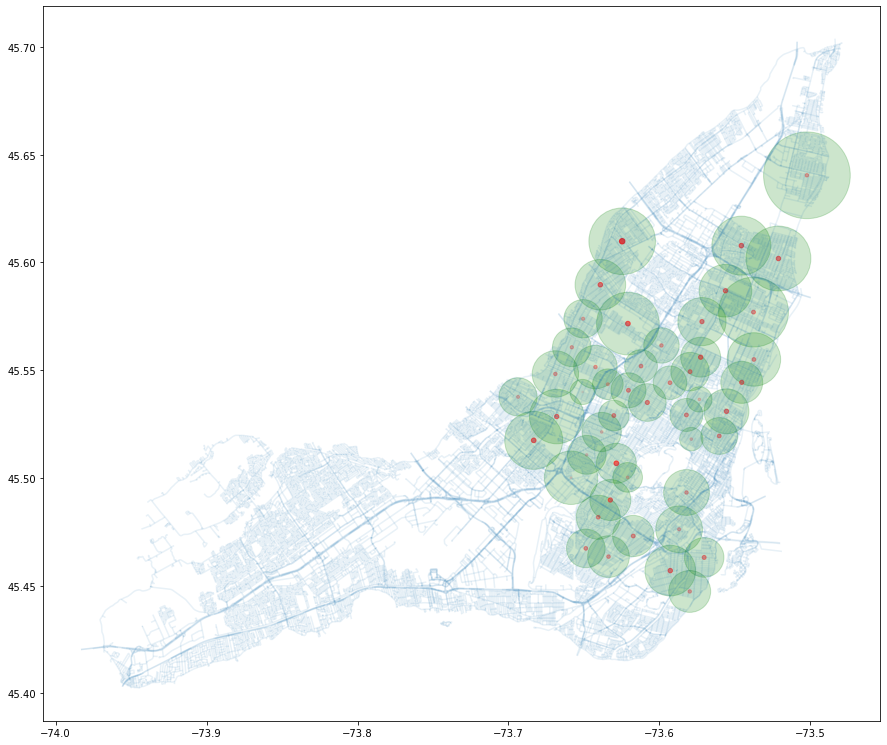

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
mtl_map.plot(ax=ax,alpha=0.1)
gdf.plot(ax=ax,color='Green',markersize=gdf['area_pct']*100000,alpha=0.2)
gdf.plot(ax=ax,color='Red',markersize=gdf['Demand_20'],alpha=gdf['Demand_20']/40)

## Demand vs. Availability

<AxesSubplot:>

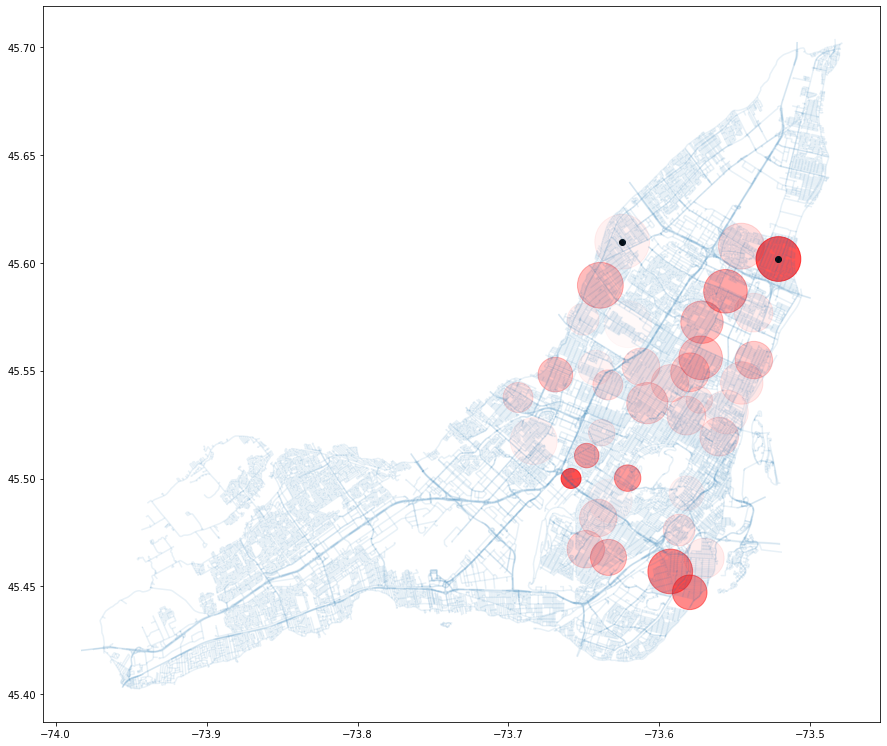

In [20]:
fig, ax = plt.subplots(figsize=(15,15))
mtl_map.plot(ax=ax,alpha=0.1)
#gdf.plot(ax=ax,color='Green',markersize=gdf['area_pct']*100000,alpha=0.2)
gdf.plot(ax=ax,color='Red',markersize=gdf['Demand_20']*100,alpha=gdf['2021-11-26 19:00']/(gdf['Demand_20']*1.8))
gdf[gdf.Gift_Icon_7pm!=0].plot(ax=ax,color='Black')

# Formulate the problem

**Decision variable**:
- **$X_{i,j}$**: Number of cars moves from region i to region j
- **$S_{i,j}$**: Number of staff who will move cars from i to j, assuming one worker is able to move one car within the working hour.
- **$C_{i,j}$**: Number of customers who will move cars from i to j, assuming one customer is able to move one car only one time.
- **$Y$**: Dummy binary variable.


**Objective Function**:\
$$\sum_{i,j} Distance_{i,j} \times fuel\_cost \times X_{i,j} + wage/person/hour \times \sum_{j}\sum_{i}S_{i,j} + \sum_{i}\sum_{j}fuel\_cost \times S_{i,j} \times distance\_hq_{i}$$


**Constraints**:
- Fulfill 20% of the demand of each region:\
$\sum_{i}X_{i,j} \geq 20\% \times Demand$ for all region j
- Each car can be moved by either staff or customers:\
$C_{i,j} + S_{i,j} = X_{i,j}$ for all region i, region j if $i \neq j$
- Number of cars before moving must match the initial number of cars in that region:\
$\sum_{j}X_{i,j} = Availability_{i}$ for all region i
- Capacity of staff:\
$\sum_{i,j}S_{i,j} \leq S_{T}$
- Utilize staff before employing customers incentive approach to relocate the cars:\
$S_{T}-\sum_{i,j}S_{i,j} \leq M\times Y$\
$\sum_{i,j}C_{i,j} \leq M \times (1-Y)  $

Supply over demand percentage.

In [21]:
data['2021-11-26 19:00'].sum()/data.Demand_20.sum()

0.2597402597402597

Set target demand percentage fulfilled in each region is 20%.

In [22]:
cost_fuel_liter = 1.55
fuel_efficiency = 8.9/100000
D = 0.2

In [23]:
data = data.reset_index()
data['Demand_target'] = np.round(data['Demand_20'] * D)
data

,Postal_Code,2021-11-26 19:00,Gift_Icon_7pm,Region_Latitude,Region_Longitude,City,Administrative Region,Population,Area(km2),pop_pct,Demand,area_pct,Demand_20,geometry,Demand_target
0,H4G,2,0,45.463078,-73.570371,"Verdun, Quebec",Quebec,26868.0,2.790,0.023517,204.0,0.015654,16.0,POINT (-73.57037 45.46308),3.0
1,H4H,10,0,45.447308,-73.579942,"Verdun, Quebec",Quebec,20395.0,3.130,0.017852,155.0,0.017562,12.0,POINT (-73.57994 45.44731),2.0
2,H4E,17,0,45.456964,-73.592825,Montreal,Quebec,32159.0,4.580,0.028148,244.0,0.025697,20.0,POINT (-73.59283 45.45696),4.0
3,H4C,2,0,45.476136,-73.586952,Montreal,Quebec,15854.0,3.890,0.013877,120.0,0.021826,10.0,POINT (-73.58695 45.47614),2.0
4,H4A,0,0,45.473027,-73.617348,Montreal,Quebec,25257.0,3.030,0.022107,191.0,0.017001,15.0,POINT (-73.61735 45.47303),3.0
5,H4B,6,0,45.463461,-73.633739,Montreal,Quebec,20830.0,3.100,0.018232,158.0,0.017393,13.0,POINT (-73.63374 45.46346),3.0
6,H4V,4,0,45.467270,-73.648770,NaN,Quebec,22681.0,2.658,0.019852,172.0,0.014913,14.0,POINT (-73.64877 45.46727),3.0
7,H3X,3,0,45.481723,-73.640538,NaN,NaN,23675.0,3.460,0.020722,179.0,0.019413,14.0,POINT (-73.64054 45.48172),3.0
8,H3W,1,0,45.489721,-73.632522,Montreal,Quebec,31872.0,3.000,0.027897,241.0,0.016832,19.0,POINT (-73.63252 45.48972),4.0
9,H4P,5,0,45.500061,-73.658539,NaN,NaN,6228.0,5.100,0.005451,47.0,0.028615,4.0,POINT (-73.65854 45.50006),1.0


In [24]:
# List of regions
postal_lst = data['Postal_Code']
n = len(postal_lst)

# Stuff number
S_T = 32

# Big number M
M = 10000

# Hourly wage per travel agent
wage = 15

# Total number of cars
number_cars = data['2021-11-26 19:00'].sum()

Calculate distance info

In [25]:
# Transform to local coordinate to calculate distance
gdf_crs = gdf.to_crs("EPSG:32188")
gdf_crs = gdf_crs.reset_index()

In [69]:
gdf_crs 

,Postal_Code,2021-11-26 19:00,Gift_Icon_7pm,Region_Latitude,Region_Longitude,City,Administrative Region,Population,Area(km2),pop_pct,Demand,area_pct,Demand_20,geometry
0,H4G,2,0,45.463078,-73.570371,"Verdun, Quebec",Quebec,26868.0,2.790,0.023517,204.0,0.015654,16.0,POINT (299296.888 5035907.898)
1,H4H,10,0,45.447308,-73.579942,"Verdun, Quebec",Quebec,20395.0,3.130,0.017852,155.0,0.017562,12.0,POINT (298546.676 5034156.077)
2,H4E,17,0,45.456964,-73.592825,Montreal,Quebec,32159.0,4.580,0.028148,244.0,0.025697,20.0,POINT (297540.176 5035230.275)
3,H4C,2,0,45.476136,-73.586952,Montreal,Quebec,15854.0,3.890,0.013877,120.0,0.021826,10.0,POINT (298001.818 5037360.333)
4,H4A,0,0,45.473027,-73.617348,Montreal,Quebec,25257.0,3.030,0.022107,191.0,0.017001,15.0,POINT (295624.858 5037017.811)
5,H4B,6,0,45.463461,-73.633739,Montreal,Quebec,20830.0,3.100,0.018232,158.0,0.017393,13.0,POINT (294341.504 5035956.827)
6,H4V,4,0,45.467270,-73.648770,NaN,Quebec,22681.0,2.658,0.019852,172.0,0.014913,14.0,POINT (293166.848 5036382.174)
7,H3X,3,0,45.481723,-73.640538,NaN,NaN,23675.0,3.460,0.020722,179.0,0.019413,14.0,POINT (293813.377 5037987.097)
8,H3W,1,0,45.489721,-73.632522,Montreal,Quebec,31872.0,3.000,0.027897,241.0,0.016832,19.0,POINT (294441.482 5038874.841)
9,H4P,5,0,45.500061,-73.658539,NaN,NaN,6228.0,5.100,0.005451,47.0,0.028615,4.0,POINT (292410.151 5040027.657)


In [26]:
loc_i_j = []
for i in data['Postal_Code']:
    for j in data['Postal_Code']:
        tp = i,j
        loc_i_j.append(tp)

In [27]:
distance = {(i,j): gdf_crs[gdf_crs.Postal_Code == i]['geometry'].tolist()[0].distance(gdf_crs[gdf_crs.Postal_Code == j]['geometry'].to_list()[0]) for i, j in loc_i_j}

In [28]:
distance 

{('H4G', 'H4G'): 0.0,
 ('H4G', 'H4H'): 1905.7004418092947,
 ('H4G', 'H4E'): 1882.872865179342,
 ('H4G', 'H4C'): 1945.9627996072547,
 ('H4G', 'H4A'): 3836.106263541968,
 ('H4G', 'H4B'): 4955.625651013126,
 ('H4G', 'H4V'): 6148.359484415178,
 ('H4G', 'H3X'): 5864.465707411114,
 ('H4G', 'H3W'): 5690.142443503334,
 ('H4G', 'H4P'): 8024.932940189702,
 ('H4G', 'H3S'): 6651.706610445907,
 ('H4G', 'H3T'): 5721.686341706613,
 ('H4G', 'H3R'): 8060.169740710054,
 ('H4G', 'H4L'): 10692.54739263251,
 ('H4G', 'H4N'): 10537.977481424012,
 ('H4G', 'H3M'): 12704.080996069479,
 ('H4G', 'H3P'): 8365.152722875975,
 ('H4G', 'H3N'): 8684.968500837647,
 ('H4G', 'H3L'): 12198.753681887965,
 ('H4G', 'H2N'): 10601.286974175515,
 ('H4G', 'H2P'): 10227.846471001098,
 ('H4G', 'H2C'): 12819.292369852928,
 ('H4G', 'H2M'): 11314.8243535341,
 ('H4G', 'H2S'): 8512.746830011696,
 ('H4G', 'H2R'): 9466.633760495928,
 ('H4G', 'H2G'): 9180.865560584147,
 ('H4G', 'H2E'): 10392.650238548542,
 ('H4G', 'H2A'): 11150.65418928992

In [29]:
distance['H3T', 'H4N']

4828.93815543494

Calculate distance to headquarter to each region.

In [30]:
from shapely.geometry import Point
HQ_loc = [Point(-73.573033, 45.499511)]
hq_df = geopandas.GeoDataFrame(geometry=HQ_loc, crs=4326)
hq_df_mtl_code = hq_df.to_crs("EPSG:32188")

In [31]:
gdf_crs['geometry'][0].distance(hq_df_mtl_code['geometry'][0])

4054.1720612120916

In [32]:
distance_hq = {i: gdf_crs[gdf_crs.Postal_Code == i]['geometry'].tolist()[0].distance(hq_df_mtl_code['geometry'][0]) for i in data['Postal_Code']}

In [33]:
distance_hq['H4G']

4054.1720612120916

In [34]:
distance_hq

{'H4G': 4054.1720612120916,
 'H4H': 5826.446711923499,
 'H4E': 4974.986351866952,
 'H4C': 2816.307890611013,
 'H4A': 4545.566275665035,
 'H4B': 6210.613063641811,
 'H4V': 6920.3280446363,
 'H3X': 5634.561598127741,
 'H3W': 4775.138569009627,
 'H4P': 6682.626596310582,
 'H3S': 4412.621420045777,
 'H3T': 3754.066454299713,
 'H3R': 6001.100381497407,
 'H4L': 8840.9480479801,
 'H4N': 8090.375062463143,
 'H3M': 10330.77297669861,
 'H3P': 5639.892774568473,
 'H3N': 5536.323347712089,
 'H3L': 9241.44379384101,
 'H2N': 7556.450927801709,
 'H2P': 6829.604001295842,
 'H2C': 9494.75733408869,
 'H2M': 7912.691900972392,
 'H2S': 4794.826759338191,
 'H2R': 5885.300259036989,
 'H2G': 5199.856023647997,
 'H2E': 6572.129122865258,
 'H2A': 7165.795028430456,
 'H1Z': 8836.345595942352,
 'H2B': 10240.5224685101,
 'H1H': 11262.921411812205,
 'H1G': 12899.739664905623,
 'H1Y': 5554.9053933385285,
 'H1X': 6276.594866814243,
 'H1T': 8110.773496391924,
 'H1M': 9789.186925199017,
 'H1K': 12214.524544207903,
 'H

In [35]:
prob = gb.Model("Shared Car Relocation by FRA")

Academic license - for non-commercial use only - expires 2022-01-25
Using license file /Users/annary1996/gurobi.lic


In [36]:
X = prob.addVars(n, n, lb =0 ,vtype = GRB.INTEGER, name = ['cars_moved_'+i+'_'+j for i in postal_lst for j in postal_lst])

In [37]:
S = prob.addVars(n, n,lb =0 ,vtype = GRB.INTEGER, name = ['staff_work_on_'+i+'_'+j for i in postal_lst for j in postal_lst])

In [38]:
C = prob.addVars(n, n,lb =0 , vtype = GRB.INTEGER, name = ['customers_move_'+i+'_'+j for i in postal_lst for j in postal_lst])

In [39]:
Y = prob.addVar(vtype = GRB.BINARY, name = 'Dummy')

In [40]:
prob.setObjective(sum(distance[postal_lst[i],postal_lst[j]]* X[i,j]*fuel_efficiency*cost_fuel_liter for i in range(n) for j in range(n))
                  + wage*sum(S[i,j] for i in range(n) for j in range(n))
                  + fuel_efficiency*cost_fuel_liter*sum(S[i,j]*distance_hq[postal_lst[i]] for i in range(n) for j in range(n)),
                  GRB.MINIMIZE)

In [41]:
for i in range(n):
    for j in range(n):
        if i != j:
            prob.addConstr(X[i,j] == C[i,j]+S[i,j])
        else:
            prob.addConstr(C[i,j]==0)
            prob.addConstr(S[i,j]==0)

In [42]:
for j in range(n):
    prob.addConstr(sum(X[i,j] for i in range(n)) >= data[data.Postal_Code==postal_lst[j]]['Demand_target'].to_list()[0])

In [43]:
for i in range(n):
    prob.addConstr(sum(X[i,j] for j in range(n)) == data[data.Postal_Code==postal_lst[i]]['2021-11-26 19:00'].to_list()[0])

In [44]:
prob.addConstr(sum(S[i,j] for i in range(n) for j in range(n)) <= S_T)

<gurobi.Constr *Awaiting Model Update*>

In [45]:
prob.addConstr(S_T - sum(S[i,j] for i in range(n) for j in range(n)) <= M*Y)
prob.addConstr(sum(C[i,j] for i in range(n) for j in range(n)) <= M*(1-Y))

<gurobi.Constr *Awaiting Model Update*>

In [46]:
prob.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2451 rows, 6913 columns and 18386 nonzeros
Model fingerprint: 0x45d60f2a
Variable types: 0 continuous, 6913 integer (1 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e-01, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Presolve removed 2362 rows and 3302 columns
Presolve time: 0.17s
Presolved: 89 rows, 3611 columns, 12580 nonzeros
Variable types: 0 continuous, 3611 integer (666 binary)

Root relaxation: objective 2.295684e+01, 119 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0   22.95684    0    3          -   22.95684      -     -    0s
H    0     0                     687.9322172   22.95684  96.7%     -    0s
H    0     0     

In [47]:
for var in prob.getVars():
    if var.x > 0:
        print(var.varName,'=', var.x)

cars_moved_H4G_H4G = 2.0
cars_moved_H4H_H4H = 10.0
cars_moved_H4E_H4G = 1.0
cars_moved_H4E_H4E = 12.0
cars_moved_H4E_H4C = 2.0
cars_moved_H4E_H4A = 2.0
cars_moved_H4C_H3H = 2.0
cars_moved_H4B_H4A = 1.0
cars_moved_H4B_H4B = 3.0
cars_moved_H4B_H3W = 2.0
cars_moved_H4V_H4V = 3.0
cars_moved_H4V_H3W = 1.0
cars_moved_H3X_H3X = 3.0
cars_moved_H3W_H3W = 1.0
cars_moved_H4P_H4P = 1.0
cars_moved_H4P_H4L = 2.0
cars_moved_H4P_H4N = 2.0
cars_moved_H3T_H3S = 5.0
cars_moved_H3R_H3R = 1.0
cars_moved_H3R_H4N = 2.0
cars_moved_H3R_H3N = 1.0
cars_moved_H4L_H4L = 2.0
cars_moved_H3M_H3M = 2.0
cars_moved_H3P_H3P = 1.0
cars_moved_H3L_H3L = 2.0
cars_moved_H3L_H2N = 1.0
cars_moved_H3L_H2C = 1.0
cars_moved_H3L_H2M = 1.0
cars_moved_H2P_H2P = 2.0
cars_moved_H2M_H2M = 1.0
cars_moved_H2S_H3N = 2.0
cars_moved_H2S_H2R = 3.0
cars_moved_H2G_H2S = 2.0
cars_moved_H2G_H2G = 1.0
cars_moved_H2E_H2E = 3.0
cars_moved_H1Z_H1Z = 1.0
cars_moved_H2B_H2B = 1.0
cars_moved_H1H_H2C = 1.0
cars_moved_H1H_H1Z = 1.0
cars_moved_H1H_H2B = 1.

## Export the output
Based on initial region, destination region, number of cars moved, distance and type of decision variables.

In [48]:
result_car = {}
car_moved = []
region_init = []
region_dest = []
distance_r = []
for j in range(n):
    for i in range(n):
        car_moved.append(X[i,j].x)
        region_init.append(postal_lst[i])
        region_dest.append(postal_lst[j])
        distance_r.append(distance[postal_lst[i],postal_lst[j]])
result_car['region_init'] = region_init
result_car['region_dest'] = region_dest
result_car['cars_moved'] = car_moved
result_car['distance_region'] = distance_r

In [49]:
result_car_df = pd.DataFrame(result_car)
result_car_df['data_type'] = 'cars_moved'

In [50]:
result_car_df

,region_init,region_dest,cars_moved,distance_region,data_type
0,H4G,H4G,2.0,0.000000,cars_moved
1,H4H,H4G,0.0,1905.700442,cars_moved
2,H4E,H4G,1.0,1882.872865,cars_moved
3,H4C,H4G,0.0,1945.962800,cars_moved
4,H4A,H4G,0.0,3836.106264,cars_moved
...,...,...,...,...,...
2299,H2W,H2L,0.0,1453.911047,cars_moved
2300,H2H,H2L,0.0,2147.957760,cars_moved
2301,H2J,H2L,1.0,2014.883669,cars_moved
2302,H2K,H2L,2.0,1326.029673,cars_moved


In [51]:
result_staff = {}
staff_car_moved = []
staff_region_init = []
staff_region_dest = []
staff_distance_r = []
for j in range(n):
    for i in range(n):
        staff_region_init.append(postal_lst[i])
        staff_region_dest.append(postal_lst[j])
        staff_car_moved.append(S[i,j].x)
        staff_distance_r.append(distance[postal_lst[i],postal_lst[j]])
result_staff['region_init'] = staff_region_init
result_staff['region_dest'] = staff_region_dest
result_staff['cars_moved'] = staff_car_moved
result_staff['distance_region'] = staff_distance_r

In [52]:
result_staff_df = pd.DataFrame(result_staff)
result_staff_df['data_type'] = 'staff'

In [53]:
result_staff_df

,region_init,region_dest,cars_moved,distance_region,data_type
0,H4G,H4G,0.0,0.000000,staff
1,H4H,H4G,-0.0,1905.700442,staff
2,H4E,H4G,1.0,1882.872865,staff
3,H4C,H4G,-0.0,1945.962800,staff
4,H4A,H4G,0.0,3836.106264,staff
...,...,...,...,...,...
2299,H2W,H2L,0.0,1453.911047,staff
2300,H2H,H2L,-0.0,2147.957760,staff
2301,H2J,H2L,1.0,2014.883669,staff
2302,H2K,H2L,2.0,1326.029673,staff


In [54]:
result_customers = {}
customers_car_moved = []
customers_region_init = []
customers_region_dest = []
customers_distance_r = []
for j in range(n):
    for i in range(n):
        customers_region_init.append(postal_lst[i])
        customers_region_dest.append(postal_lst[j])
        customers_car_moved.append(C[i,j].x)
        customers_distance_r.append(distance[postal_lst[i],postal_lst[j]])
result_customers['region_init'] = customers_region_init
result_customers['region_dest'] = customers_region_dest
result_customers['cars_moved'] = customers_car_moved
result_customers['distance_region'] = customers_distance_r

In [55]:
result_customers_df = pd.DataFrame(result_customers)
result_customers_df['data_type'] = 'customers'

In [56]:
df = pd.concat([result_car_df, result_staff_df,result_customers_df])

In [57]:
df = df.reset_index(drop=True)
df

,region_init,region_dest,cars_moved,distance_region,data_type
0,H4G,H4G,2.0,0.000000,cars_moved
1,H4H,H4G,0.0,1905.700442,cars_moved
2,H4E,H4G,1.0,1882.872865,cars_moved
3,H4C,H4G,0.0,1945.962800,cars_moved
4,H4A,H4G,0.0,3836.106264,cars_moved
...,...,...,...,...,...
6907,H2W,H2L,0.0,1453.911047,customers
6908,H2H,H2L,-0.0,2147.957760,customers
6909,H2J,H2L,-0.0,2014.883669,customers
6910,H2K,H2L,-0.0,1326.029673,customers


In [58]:
df.to_csv('results_fin.csv')

In [59]:
fuel_efficiency*cost_fuel_liter*sum(S[i,j].x*distance_hq[postal_lst[i]] for i in range(n) for j in range(n))

17.954691229910416

## Number of cars at each region after relocation

In [60]:
result = {}
for j in postal_lst:
    lst = []
    for i in postal_lst:
        name = 'cars_moved_'+i+'_'+j
        for var in prob.getVars():
            if var.varName == name:
                lst.append(var.x)
    result[j] = sum(lst)

In [61]:
region = result.keys()
cars = [result[k] for k in region]
result_pd = pd.DataFrame({'region':region,'cars':cars})

In [62]:
result_pd.cars.sum()

180.0

In [63]:
result_pd

,region,cars
0,H4G,3.0
1,H4H,10.0
2,H4E,12.0
3,H4C,2.0
4,H4A,3.0
5,H4B,3.0
6,H4V,3.0
7,H3X,3.0
8,H3W,4.0
9,H4P,1.0


In [64]:
data_shuffled = gdf.join(result_pd.set_index('region'),how='left')

In [65]:
data_shuffled

,2021-11-26 19:00,Gift_Icon_7pm,Region_Latitude,Region_Longitude,City,Administrative Region,Population,Area(km2),pop_pct,Demand,area_pct,Demand_20,geometry,cars
Postal_Code,,,,,,,,,,,,,,
H4G,2,0,45.463078,-73.570371,"Verdun, Quebec",Quebec,26868.0,2.790,0.023517,204.0,0.015654,16.0,POINT (-73.57037 45.46308),3.0
H4H,10,0,45.447308,-73.579942,"Verdun, Quebec",Quebec,20395.0,3.130,0.017852,155.0,0.017562,12.0,POINT (-73.57994 45.44731),10.0
H4E,17,0,45.456964,-73.592825,Montreal,Quebec,32159.0,4.580,0.028148,244.0,0.025697,20.0,POINT (-73.59283 45.45696),12.0
H4C,2,0,45.476136,-73.586952,Montreal,Quebec,15854.0,3.890,0.013877,120.0,0.021826,10.0,POINT (-73.58695 45.47614),2.0
H4A,0,0,45.473027,-73.617348,Montreal,Quebec,25257.0,3.030,0.022107,191.0,0.017001,15.0,POINT (-73.61735 45.47303),3.0
H4B,6,0,45.463461,-73.633739,Montreal,Quebec,20830.0,3.100,0.018232,158.0,0.017393,13.0,POINT (-73.63374 45.46346),3.0
H4V,4,0,45.467270,-73.648770,NaN,Quebec,22681.0,2.658,0.019852,172.0,0.014913,14.0,POINT (-73.64877 45.46727),3.0
H3X,3,0,45.481723,-73.640538,NaN,NaN,23675.0,3.460,0.020722,179.0,0.019413,14.0,POINT (-73.64054 45.48172),3.0
H3W,1,0,45.489721,-73.632522,Montreal,Quebec,31872.0,3.000,0.027897,241.0,0.016832,19.0,POINT (-73.63252 45.48972),4.0


<AxesSubplot:>

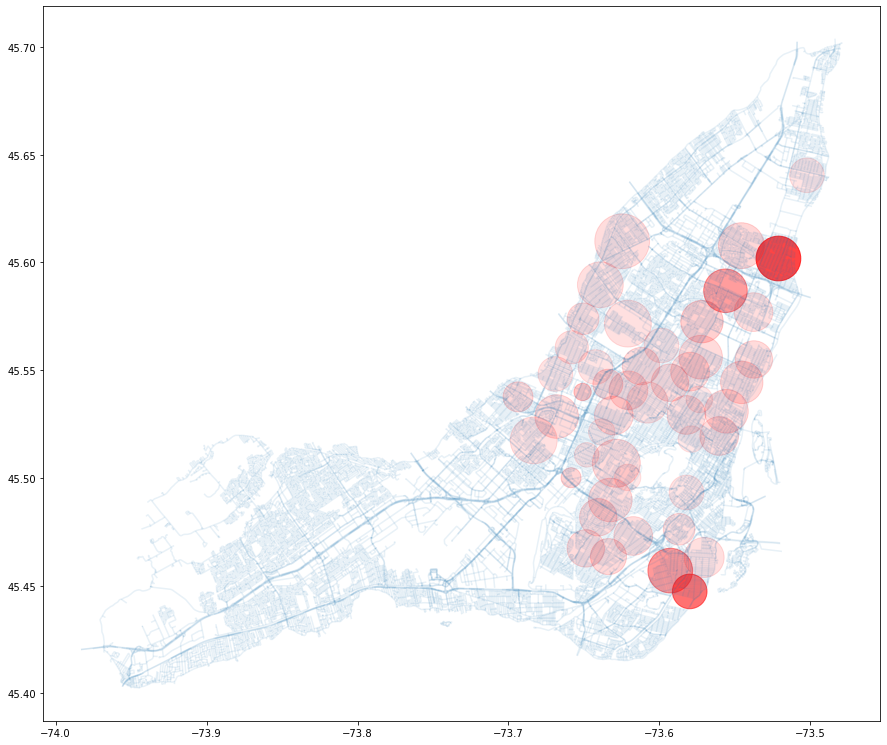

In [67]:
fig, ax = plt.subplots(figsize=(15,15))
mtl_map.plot(ax=ax,alpha=0.1)
data_shuffled.plot(ax=ax,color='Red',markersize=data_shuffled['Demand_20']*100,alpha=data_shuffled['cars']/(data_shuffled['Demand_20']*1.5))